In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 100)

In [2]:
features_df = pd.read_csv(
    "training_set_features_.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels_.csv", 
    index_col="respondent_id"
)

In [3]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Let's double-check that the rows between the features and the labels match up. We don't want to have the wrong labels. Numpy's assert_array_equal will error if the two arrays—the row indices of the two data frames—don't match up.

In [6]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

## Exploratory Data Analysis

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's start by taking a look at the distribution of the two target variables.

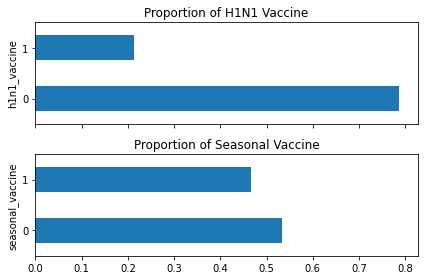

In [8]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]



(labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")




(labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")



fig.tight_layout()

Only approximately 20% of persons appear to have received the H1N1 flu vaccine, compared to almost half of those who received the seasonal flu vaccine. In terms of class balance, we say that the H1N1 flu vaccination classes is slightly more unbalanced than the seasonal flu vaccine.

Now, Let's look at whether or not the two target variables are separate.

In [9]:
pd.crosstab(
    labels_df["h1n1_vaccine"], 
    labels_df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [10]:
(labels_df["h1n1_vaccine"].corr(labels_df["seasonal_vaccine"], method="pearson"))

0.37714265306144495

The somewhat positive correlation between these two variables is indicated by their phi coefficient of 0.37. That is also evident in the cross-tabulation. The majority of persons who received an H1N1 flu vaccine also received a seasonal flu shot. 

A smaller percentage of those who had the seasonal vaccine also received the H1N1 vaccine, but they did so at a higher rate than those who did not receive the seasonal vaccine.

## Metrics of features

Let's move on to analyzing our features. We know the feature variables are almost all categorical—a combination of binary, ordinal, and nominal features—from the problem description. Let's choose a few and examine how the immunisation rates may vary depending on the severity of the feature factors.

Merging our labels and features into a single dataframe.

In [11]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Prototyping Plot

Let's now examine the correlation between the features and the target variables. We'll try to visualise whether there is a straightforward bivariate correlation first. If a characteristic is connected with the target, we would anticipate that as the feature's values are changed, various vaccination patterns will emerge. 

It's challenging to move directly to the proper final visualisation. Instead, we can start with one feature and one target, build a prototype, then use it for additional features and both targets. As a goal variable, we'll utilise h1n1 concern, which measures how concerned a person was about the H1N1 flu, and h1n1 vaccine.

The count of observations for each combination of those two variables will be obtained first.

In [12]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


It's challenging to identify patterns in these unprocessed data by just looking at the table. Let's represent this in a bar graph. We'll contrast how the group sizes alter as your choices change. h1n1 concern

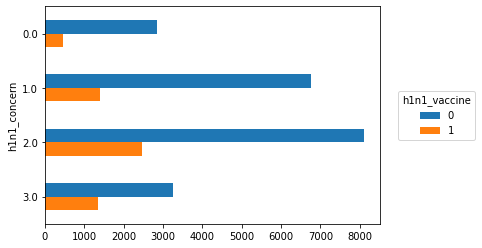

In [13]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='h1n1_vaccine')

Consequently, it's still difficult to determine if variations in h1n1 concern levels correspond to variations in a person's propensity to receive vaccination. We simply observe fewer vaccinated observations for every degree of h1n1 concern because the two classes are imbalanced. It overshadows any potential competing trends. 

Instead, let's examine the vaccination rates for each degree of h1n1 concern.

In [14]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [15]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


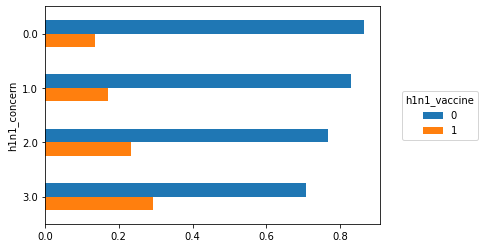

In [16]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title='h1n1_vaccine')

Our understanding of what's happening has improved now! Each pair of blue (no vaccination) and orange (vaccination received) bars in this graph adds up to 1.0. It is obvious that even though the majority of people do not receive the H1N1 vaccine, those who are more concerned are more likely to do so. When we come to modelling, it seems like h1n1 concern will be a valuable tool. 

This is actually a good use case for a stacked bar chart, to make it even easier to read, because every pair of bars adds up to 1.0 and we only have two bars.

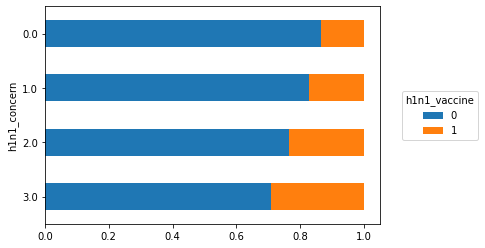

In [17]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title='h1n1_vaccine')

As shown above, the same item is being shown in a more condensed plot in this instance.

## Plotting More Variables

Creating a function to visualize more varaiables

In [18]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Then, we'll plot against both the seasonal vaccine and the H1N1 vaccine by looping through columns.

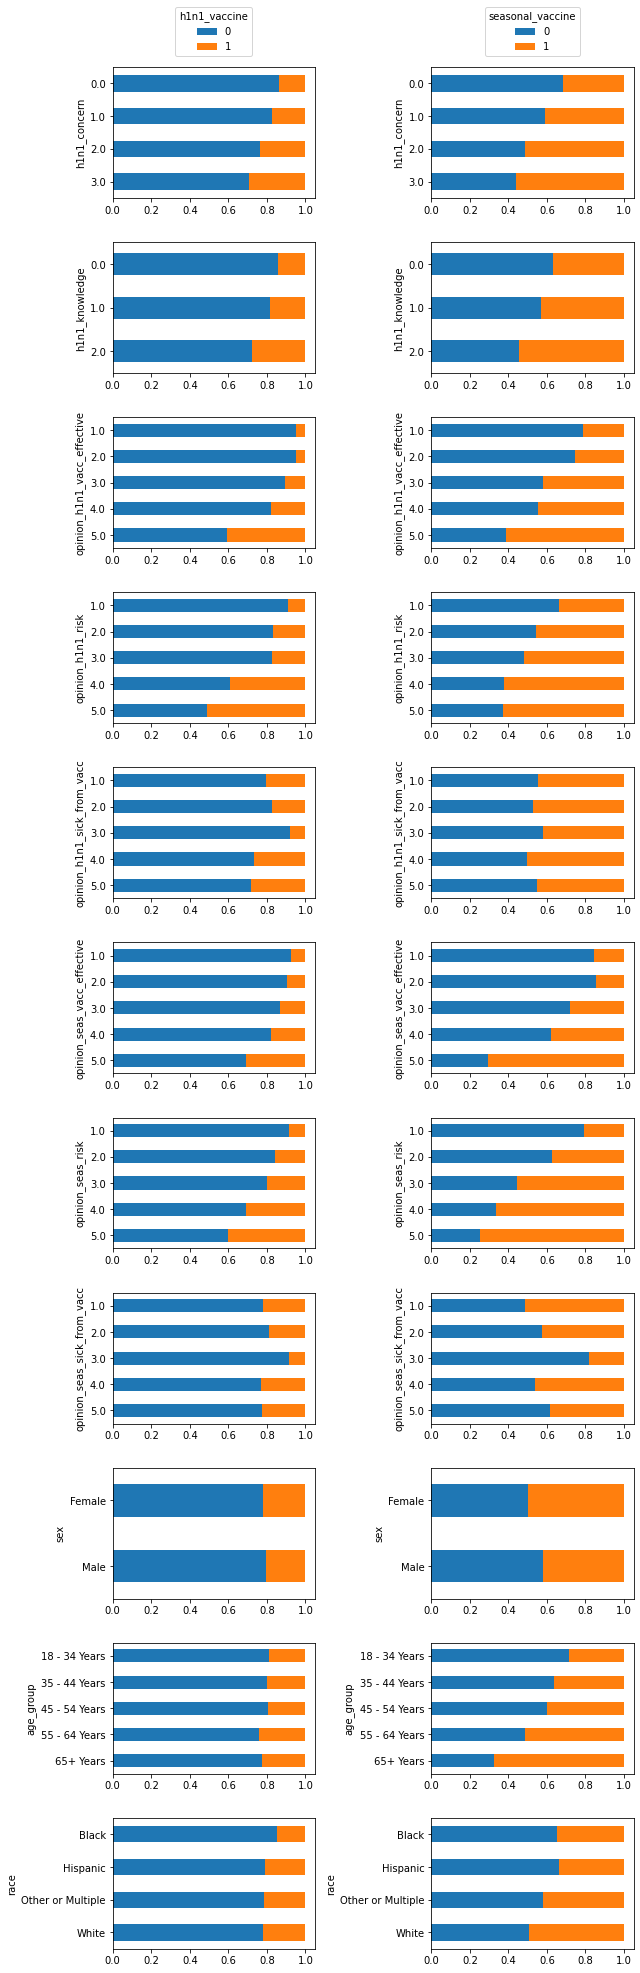

In [19]:
cols_to_plot = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','sex','age_group','race',]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

The signals for both the knowledge and opinion queries appear to be quite strong. 

The demographic characteristics are more strongly correlated with seasonal vaccination than H1N1 vaccination, however. We notice an intriguing link between age group and the seasonal vaccine but not the h1n1 vaccine. It seems that when the seasonal flu strikes, individuals behave responsibly in light of the knowledge that older persons are more likely to be affected and to experience difficulties from the flu. 

In spite of the fact that older persons have a higher risk of complications, it turns out that they are less likely to contract the H1N1 virus. While this research does not reveal anything about causality, it appears that the risk factors were ultimately reflected in the vaccination rates.

## Model Building

Let's get to work developing some models! For classification tasks, we will use logistic regression, a straightforward and quick linear model.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 42    # Set a random seed for reproducibility!

Standard logistic regression only functions with feature input that is numerical. We'll create straightforward models utilising only the dataset's numeric columns since this is a benchmark. 

For many machine learning techniques, categorical variables with non-numeric values require a little additional preprocessing. There are other techniques to convert category variables into numeric values, but we won't cover them here..

In [21]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [22]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


## Feature Engineering

Before moving on to the logistic regression, there are two crucial data preprocessing steps: 

Scaling: It is vital to apply regularisation when adjusting each feature's scale to be the same . Z-score scaling, commonly known as StandardScaler, will be used. Features are scaled and shifted in such a way that their variance and mean are both equal to one. 

NA Imputation: Logistic regression does not handle NA values. We'll utilise SimpleImputer's median imputation, which uses the median of training data to fill in missing values. 
In order to organise everything into a pipeline, we'll also start utilising Scikit-learn built-in composition functionality. 

Establishing pipelines is best practise for builing machine learning models. It also makes it simple to reuse on new data, among other advantages (such as our test data). The beautiful thing about pipelines is that you can treat them as transformers and estimators because they have the same interface. 

We will first connect the preprocessing steps (scaling and imputing) into the intermediate pipeline object "numeric preprocessing steps" in the codde below. We then combine it with Scikit-learn's "ColumnTransformer", a handy tool for extracting columns from a pandas data frame and applying a specific transformer. 

Other variables would be added to the transformers argument of "ColumnTransformer" if we wanted to perform additional transformations on additional columns, such as encoding our non-numeric columns.

In [23]:
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()), ('simple_imputer', SimpleImputer(strategy='median'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(transformers = [("numeric", numeric_preprocessing_steps, numeric_cols)], remainder = "drop")

For LogisticRegression of L2 (also known as Ridge) regularisation, we'll use Scikit-learn's default hyperparameters with a C value (inverse regularisation strength) of 1. Regularization is helpful as it minimizes overfitting.

Note that we can tune our hyperparameters using something like GridSearchCV.

Scikit-learn's "MultiOutputClassifier" will be used since we have two labels to predict. This is a practical shortcut for simultaneously training two models of the same kind.

In [24]:
estimators = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1))

We combine the estimator and preprocessing steps into a single Pipeline object, giving us a single interface to run all of the data through.

In [25]:
# The Full Pipeline

full_pipeline = Pipeline([("preprocessor", preprocessor), ("estimators", estimators),])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

## Model Training and Evaluation

Let's now prepare to train and assess our model. 

Let's divide the data we have at hand into a training set and an evaluation set. We'll use a third of our data for evaluation (reserving the "test set" for our final predictions). 

Recall that the h1n1 vaccine label classes were moderately unbalanced earlier in our exploratory analysis. This can occasionally result in unbalanced splits, which can cause issues with generalisation when fitting and/or assessing the model. A randomly shuffled split should maintain the same proportions because our dataset should be sufficiently large, but we may use the "stratify" parameter to require even splits instead.

In [26]:
X_train, X_eval, y_train, y_eval = train_test_split(features_df, labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED)

Now, let's train the model!

In [27]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# In this project we use probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

[array([[0.9370031 , 0.0629969 ],
        [0.24217469, 0.75782531],
        [0.95826257, 0.04173743],
        ...,
        [0.18671901, 0.81328099],
        [0.9839001 , 0.0160999 ],
        [0.74724923, 0.25275077]]), array([[0.98139237, 0.01860763],
        [0.09231535, 0.90768465],
        [0.95327723, 0.04672277],
        ...,
        [0.09706328, 0.90293672],
        [0.58177139, 0.41822861],
        [0.56670581, 0.43329419]])]

In [28]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8814, 2)
test_probas[1].shape (8814, 2)


We received a list of two arrays as a result of code as shown above. The seasonal vaccine array is the second after the h1n1 vaccine array. Each array signifies two columns representing the probabilities for classes 0 and 1, respectively. So, for each of the two arrays, we want the second column (index 1). These should be taken, and then put them in a data frame.

In [29]:
y_preds = pd.DataFrame(
    {"h1n1_vaccine": preds[0][:, 1], "seasonal_vaccine": preds[1][:, 1],}, index = y_eval.index)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.062997,0.018608
12566,0.757825,0.907685
13996,0.041737,0.046723
12769,0.225619,0.971052
16915,0.074570,0.249598


The metric for this task is ROC AUC. Let's draw ROC curves and examine them. We will have to create the plot ourselves because the easy plot roc curve function provided by Scikit-Learn does not support multilabel. 

In [30]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

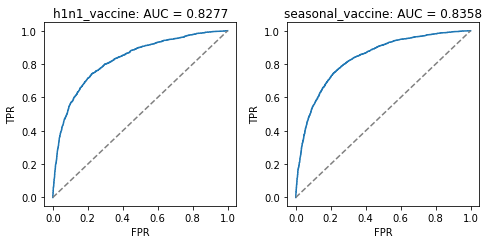

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine'], 'h1n1_vaccine', ax=ax[0])
plot_roc(y_eval['seasonal_vaccine'], y_preds['seasonal_vaccine'], 'seasonal_vaccine', ax=ax[1])
fig.tight_layout()


An AUC score of 1.0 is a good model, whereas one of 0.5 is okay. Both types appear to perform similarly in most situations. Our results of 0.83 are not terrific, but they are also not terrible either. 

Let's use the average of these two AUC values as the metric for this task. We can use roc_auc_score from Scikit-learn since it supports multilabel.

In [32]:
roc_auc_score(y_eval, y_preds)

0.8317490240860408

## Retraining the Model on Full Dataset

Now that we know how our model performed, we need to retrain our model on the entire dataset before making predictions on the test set.

In [33]:
full_pipeline.fit(features_df, labels_df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

## Making Predictions

Let's forecast the test set data! Again, for this challenge, we're looking for probabilities rather than predictions for binary labels. To obtain those, we'll once more utilize the ".predict proba" technique.

In [34]:
test_features_df = pd.read_csv("test_set_features_.csv", index_col="respondent_id")

In [35]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]), array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

The same as before, this returns two arrays: one for the seasonal vaccine and one for the h1n1 vaccine. The columns of each array represents the probabilities for classes 0 and 1, respectively. So, for each of the two arrays, we want the second column (index 1).

In [36]:
submission_df = pd.read_csv("submission_format_.csv", index_col="respondent_id")
submission_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
...,...,...
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7


We need to substitute our predictions for those 0.5s and 0.7s. To begin with, check the indices to ensure that the rows are in the same order. Then, using our estimated probabilities, we can drop the necessary columns.

In [37]:
# we are making sure the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903
